In [5]:
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Statevector

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [6]:
def anti_control(qc,qc_iso,control,target):
    target=list(target)
    control_gate=qc_iso.to_gate().control()
    qc.x(control)
    qc.append(control_gate,[control]+target)
    qc.x(control)
    return qc.to_gate()

def control(qc,qc_iso,control,target):
    target=list(target)
    control_gate=qc_iso.to_gate().control()
    return control_gate

In [7]:
def Statevector_to_rotate(state):
    theta_list=[]
    state=abs(normalize(state))
    def Statevector_to_rotate1(state,theta_list):
        state=np.array(state)
        if (len(state)>1):
            if (np.sum(state**2)>0.98):
                temp=state[0:int(len(state)/2)]
                temp1=state[int(len(state)/2):len(state)]
                theta=round(math.acos(np.sqrt(np.sum(temp**2)))*2,8)
                if np.sum(temp)!=0:
                    temp=normalize(temp)
                if np.sum(temp1)!=0:
                    temp1=normalize(temp1)
                theta_list.append(theta)
                Statevector_to_rotate1(temp,theta_list)
                Statevector_to_rotate1(temp1,theta_list)
            else:
                temp=state[0:int(len(state)/2)]
                temp1=state[int(len(state)/2):len(state)]
                Statevector_to_rotate1(temp,theta_list)
                theta_list.append(0)
                Statevector_to_rotate1(temp1,theta_list)
        else:
            return theta_list
    Statevector_to_rotate1(state,theta_list)
    return theta_list
def Statevector_to_rotate2(state):
    theta_list=[]
    state=abs(normalize(state))
    def Statevector_to_rotate3(state,theta_list):
        state=np.array(state)
        if (len(state)>1):
            if (np.sum(state**2)>0.98):
                temp=state[0:int(len(state)/2)]
                temp1=state[int(len(state)/2):len(state)]
                theta=round(math.acos(np.sqrt(np.sum(temp**2)))*2,8)
                if np.sum(temp)!=0:
                    temp=normalize(temp)
                if np.sum(temp1)!=0:
                    temp1=normalize(temp1)
                Statevector_to_rotate3(temp,theta_list)
                theta_list.append(theta)
                Statevector_to_rotate3(temp1,theta_list)
            else:
                temp=state[0:int(len(state)/2)]
                temp1=state[int(len(state)/2):len(state)]
                Statevector_to_rotate3(temp,theta_list)
                theta_list.append(0)
                Statevector_to_rotate3(temp1,theta_list)
        else:
            return theta_list
    Statevector_to_rotate3(state,theta_list)
    return theta_list
def My_binary(number,full):
    def binary(number):
        if number==0:
            return '0'
        if number==1:
            return '1'
        if (number%2==0):
            return binary(number//2)+'0'
        else:
            return binary(number//2)+'1'
    temp=binary(number)
    while(len(temp)<full):
        temp='0'+temp
    return temp

In [8]:
def normalize(state_vector):
    temp=np.array(state_vector)
    normalized_v = temp / np.sqrt(np.sum(temp**2))
    return normalized_v
def make_gate(qc,state):
    theta=Rotation_Theta(state)
    Dim=int(math.log2(len(theta)+1))
    index_=0
    ##if Dim%2==1:
        ##qc.x(0)
    for i in range(1,Dim+1):
        for j in range(0,2**(i-1)):
            if i==1:
                qc.ry(theta[0],qc.num_qubits-1)
            else:
                Control=int(i)-1
                index=My_binary(j,i-1)
                for k in range(0,i-1):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)
                qc_iso=QuantumCircuit(1)
                qc_iso.ry(theta[index_+1],0)
                controlled_gate = UnitaryGate(Operator(qc_iso),'Ry\n'+str(round(theta[index_+1]/3.141592,2))+'π').control(Control)
                qc.append(controlled_gate,[-k for k in range(1,i+1)])
                for k in range(0,i-1):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)
                index_+=1
    temp=[i for i in range(len(state))]
    for i in range(len(state)):
        if state[i]<0:
            index=My_binary(i,Dim)
            for k in range(0,Dim):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)
            qc_iso=QuantumCircuit(1)
            qc_iso.z(0)
            controlled_gate=UnitaryGate(Operator(qc_iso),'cz').control(Dim-1)
            qc.append(controlled_gate,[j for j in range(0,Dim)])
            for k in range(0,Dim):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)

In [9]:
def make_gate1(qc,state):
    theta=Rotation_Theta(state)
    Dim=int(math.log2(len(theta)+1))
    index_=0
    ##if Dim%2==1:
        ##qc.x(0)
    for i in range(1,Dim+1):
        for j in range(0,2**(i-1)):
            if i==1:
                qc.ry(theta[0],qc.num_qubits-1)
            else:
                Control=int(i)-1
                index=My_binary(j,i-1)
                for k in range(0,i-1):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)
                qc_iso=QuantumCircuit(1)
                qc_iso.ry(theta[index_+1],0)
                controlled_gate = UnitaryGate(Operator(qc_iso),'Ry\n'+str(round(theta[index_+1]/3.141592,2))+'π').control(Control)
                qc.append(controlled_gate,[-k for k in range(1,i+1)])
                for k in range(0,i-1):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)
                index_+=1
    temp=[i for i in range(len(state))]
    for i in range(len(state)):
        if state[i]<0:
            index=My_binary(i,Dim)
            for k in range(0,Dim):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)
            qc_iso=QuantumCircuit(1)
            qc_iso.z(0)
            controlled_gate=UnitaryGate(Operator(qc_iso),'cz').control(Dim-1)
            qc.append(controlled_gate,[j for j in range(0,Dim)])
            for k in range(0,Dim):
                    if index[k]=='0':
                        qc.x(qc.num_qubits-k-1)

In [10]:
from typing import List


class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        if inorder:
            index = inorder.index(preorder.pop(0))
            node = TreeNode(inorder[index])
            node.left = self.buildTree(preorder, inorder[0:index])
            node.right = self.buildTree(preorder, inorder[index + 1:])


            return node

def pre_order(node):
    print(node.val, end=' ')
    if node.left != None:
        pre_order(node.left)
    if node.right != None:
        pre_order(node.right)

class ArrayQueue:

    def __init__(self):
        self.data = []

    def size(self):
        return len(self.data)

    def isEmpty(self):
        return self.size() == 0

    def enqueue(self, item):
        self.data.append(item)

    def dequeue(self):
        return self.data.pop(0)

    def peek(self):
        return self.data[0]

class BinaryTree:

    def __init__(self, r):
        self.root = r

    def bft(self):
        traversal = []
        visitQueue = ArrayQueue()
        if self.root:
            visitQueue.enqueue(self.root)
        while visitQueue.isEmpty()==False:
            node = visitQueue.dequeue()
            traversal.append(node.val)
            if node.left:
                visitQueue.enqueue(node.left)
            if node.right:
                visitQueue.enqueue(node.right)
            
        return traversal
def Rotation_Theta(state):
    A=TreeNode()
    A=Solution()
    node=A.buildTree(Statevector_to_rotate(state),Statevector_to_rotate2(state))
    node1=BinaryTree(node)
    B=node1.bft()
    return B

In [11]:
def Quantum_inner_product(state1,state2):
    Dim=int(math.log2(len(state1)))
    qc=QuantumCircuit(Dim+1,1)
    qc.h(0)
    qc_iso=QuantumCircuit(Dim)
    make_gate(qc_iso,state1)
    gate=qc_iso.to_gate()
    gate.label='state1'
    controlled_gate=gate.control()
    qc.append(controlled_gate,[i for i in range(Dim+1)])
    qc.x(0)
    qc_iso=QuantumCircuit(Dim)
    make_gate(qc_iso,state2)
    gate=qc_iso.to_gate()
    gate.label='state2'
    controlled_gate=gate.control()
    qc.append(controlled_gate,[i for i in range(Dim+1)])
    qc.h(0)
    return qc

In [12]:
"""def discriminator(information,inform):
    qc_iso1=Input_information(information)
    qc_iso2=dis_information(inform,information)
    gate_input=UnitaryGate(Operator(qc_iso1),"Input infromation").control(1)
    gate_dis=UnitaryGate(Operator(qc_iso2),"Dis infromation").control(1)
    state=QuantumRegister(qc_iso1.num_qubits,"state")
    Ancila=QuantumRegister(3,"ancilla")
    clbt=ClassicalRegister(1,"Clbt")
    qc_1=QuantumCircuit(Ancila,state,clbt)
    qc_1.h(Ancila[2])
    qc_1.append(gate_input,[Ancila[2]]+state[0:])
    qc_1.x(Ancila[2])
    qc_1.append(gate_dis,[Ancila[2]]+state[0:])
    qc_1.h(Ancila[1])
    qc_1.h(Ancila[0])
    qc_1.append(swap_control,Ancila[0:])
    qc_1.h(Ancila[0])
    qc_1.measure(0,0)
    return qc_1

SyntaxError: EOF while scanning triple-quoted string literal (4017684056.py, line 19)

In [24]:
def discriminator(information,inform):
    qc_iso1=Input_information(information)
    qc_iso2=dis_information(inform,information)
    index_=len(information)
    index_num=int(math.log2(index_))
    index=QuantumRegister(index_num, "index")
    Dim=int(math.log2(len(information[0][0])))
    state=QuantumRegister(Dim,"state")
    res=QuantumRegister(1,"value")
    gate_input=UnitaryGate(Operator(qc_iso1),"Input infromation").control(1)
    gate_dis=UnitaryGate(Operator(qc_iso2),"Dis infromation").control(1)
    Ancila=QuantumRegister(3,"ancilla")
    cl=ClassicalRegister(1,"clbt")
    qc_1=QuantumCircuit(Ancila,index,state,res,cl)
    qc_1.h(Ancila[2])
    qc_1.append(gate_input,[Ancila[2]]+index[0:]+state[0:]+res[0:])
    qc_1.x(Ancila[2])
    qc_1.append(gate_dis,[Ancila[2]]+index[0:]+state[0:]+res[0:])
    qc_1.h(Ancila[1])
    qc_1.h(Ancila[0])
    qc_1.append(swap_control,Ancila[0:])
    qc_1.h(Ancila[0])
    qc_1.measure(0,0)
    return qc_1
def Input_information(information):
    index_=len(information)
    index_num=int(math.log2(index_))
    index=QuantumRegister(index_num, "index")
    Dim=int(math.log2(len(information[0][0])))
    state=QuantumRegister(Dim,"state")
    res=QuantumRegister(1,"value")
    qc=QuantumCircuit(index,state,res)
    for i in range (int(index_num)):
        qc.h(index[i])
    for i in range (len(information)):
        qc_iso=QuantumCircuit(Dim)
        make_gate(qc_iso,information[i][0])
        controlled_gate=UnitaryGate(Operator(qc_iso),'state'+str(i)).control(int(math.log2(len(information))))
        index_num=My_binary(i,int(math.log2(index_)))
        for j in range(len(index_num)):
            if index_num[j]=='0':
                qc.x(j)
        qc.append(controlled_gate,index[0:]+state[0:])
        if information[i][1]==-1:
            gate=XGate().control(int(math.log2(len(information))))
            qc.append(gate,index[0:]+res[0:])
        for j in range(len(index_num)):
            if index_num[j]=='0':
                qc.x(j)
    return qc

def dis_information(inform,information):
    index_=len(information)
    index_num=math.log2(index_)
    index=QuantumRegister(index_num, "index")
    Dim=int(math.log2(len(inform[0])))
    state=QuantumRegister(Dim,"state")
    res=QuantumRegister(1,"value")
    qc=QuantumCircuit(index,state,res)
    qc.h(index[0:])
    Dim=int(math.log2(len(inform[0])))
    qc_iso=QuantumCircuit(Dim)
    make_gate(qc_iso,inform[0])
    gate=qc_iso.to_gate()
    gate.label="inform"
    qc.append(gate,state[0:])
    qc.x(res[0:])
    qc.h(res[0:])
    return qc

qc=QuantumCircuit(2)
qc.swap(0,1)
swap_control=UnitaryGate(Operator(qc),"swap_gate").control(1)

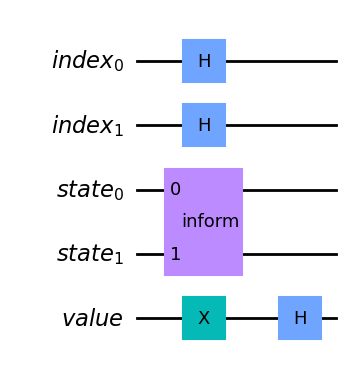

In [25]:
circ=dis_information(inform,information)
circ.draw(output='mpl')

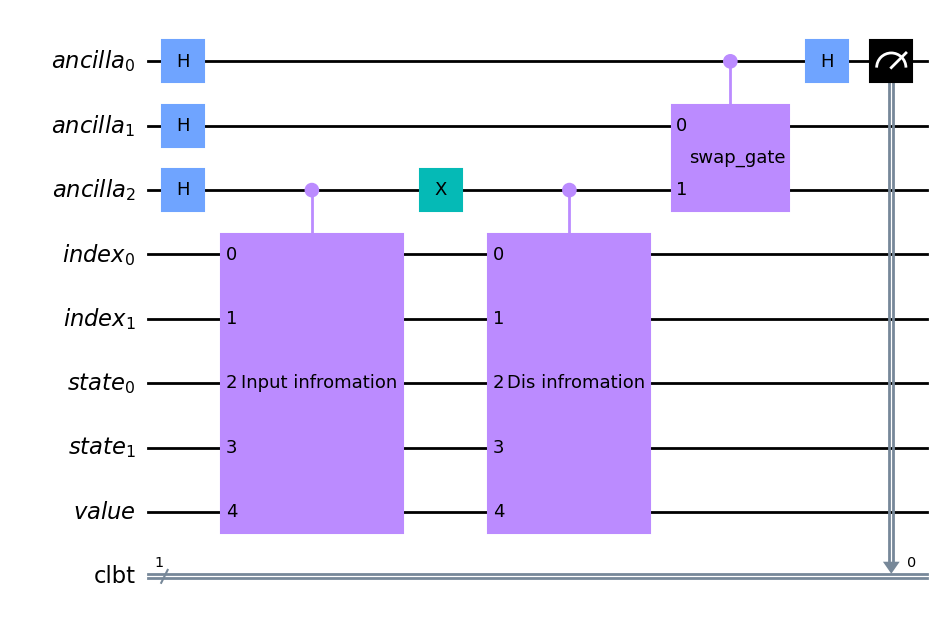

In [16]:
information=[[[1,0,0,0],-1],[[0,1,0,0],-1],[[0,0,1,0],1],[[0,0,0,1],1]]
inform=[[1,0,0,0]]
qc_1=discriminator(information,inform)
qc_1.draw("mpl")

In [75]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc_1, backend_sim), shots=10000)

# Grab the results from the job.
result_sim = job_sim.result()

In [76]:
count=result_sim.get_counts()
P=count['1']/10000
1-4*P

0.08360000000000001